<a href="https://colab.research.google.com/github/OladotunOlaiya/fault-detection/blob/main/fault_detection_07132021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [2]:
#Mounting google drive location for the dataset
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [3]:
#file_path = "/Users/oladotun/Documents/MEST Program/SEP 769/Deep Learning Projects/Project 1/archive_copy/"
file_path = 'gdrive/My Drive/Colab Notebooks/Induction Motor Faults Database (1)/'

In [4]:
#Bringing in the dataset into variables 
#normal_files = glob.glob(file_path + "normal/*.csv", recursive=True)
#imbalance_fault_files = glob.glob(file_path + "imbalance/*.csv", recursive=True)
normal_files = glob.glob(file_path + "normal/12.288.csv", recursive=True)
imbalance_fault_files = glob.glob(file_path + "imbalance/12.288.csv", recursive=True)
print(normal_files, imbalance_fault_files)

['gdrive/My Drive/Colab Notebooks/Induction Motor Faults Database (1)/normal/12.288.csv'] ['gdrive/My Drive/Colab Notebooks/Induction Motor Faults Database (1)/imbalance/12.288.csv']


In [5]:
#Reading the dataset
def dataReader(files_array, output_value = 0):
    df = pd.DataFrame()
    for file in files_array:
        df_temp = pd.read_csv(file,header=None)
        df = pd.concat([df,df_temp],ignore_index=True)
    df[len(df.columns)] = output_value
    return df

In [6]:
df_normal = dataReader(normal_files, 1)

In [7]:
df_imbalance = dataReader(imbalance_fault_files, 0)

## Check for Missing data:

In [ ]:
df_normal.isnull()

,0,1,2,3,4,5,6,7,8
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
249995,False,False,False,False,False,False,False,False,False
249996,False,False,False,False,False,False,False,False,False
249997,False,False,False,False,False,False,False,False,False
249998,False,False,False,False,False,False,False,False,False


In [ ]:
df_imbalance.isnull()

,0,1,2,3,4,5,6,7,8
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
249995,False,False,False,False,False,False,False,False,False
249996,False,False,False,False,False,False,False,False,False
249997,False,False,False,False,False,False,False,False,False
249998,False,False,False,False,False,False,False,False,False


In [ ]:
# Missing data in columns and rows
print(df_normal.isnull().sum(axis = 0),df_normal.isnull().sum(axis = 1))

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64 0         0
1         0
2         0
3         0
4         0
         ..
249995    0
249996    0
249997    0
249998    0
249999    0
Length: 250000, dtype: int64


In [ ]:
print(df_imbalance.isnull().sum(axis = 0),df_imbalance.isnull().sum(axis = 1))

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64 0         0
1         0
2         0
3         0
4         0
         ..
249995    0
249996    0
249997    0
249998    0
249999    0
Length: 250000, dtype: int64


In [8]:
df_normal

,0,1,2,3,4,5,6,7,8
0,4.55950,0.175200,0.287210,-0.017751,-0.415650,0.032459,-0.112180,-0.128140,1
1,4.60380,-0.051295,-0.194050,-0.060071,-0.418090,0.036547,-0.110430,0.118310,1
2,4.57030,-0.969080,0.038033,-0.028329,-0.430810,0.041924,-0.143310,-0.071527,1
3,4.58700,0.891270,0.072973,0.007453,-0.400170,0.041090,-0.119840,0.043445,1
4,4.58870,-1.716000,-0.329290,-0.033063,-0.502810,0.040474,-0.252700,0.023901,1
...,...,...,...,...,...,...,...,...,...
249995,-0.33352,-0.767530,-0.383180,-0.065833,0.052855,-0.000624,0.033041,0.114490,1
249996,-0.43764,0.125980,0.225880,-0.009517,0.106850,0.000140,0.088866,-0.145510,1
249997,-0.26109,0.118680,-0.225380,-0.063392,0.043998,-0.000380,0.042475,0.125850,1
249998,-0.45957,-0.793080,-0.105010,-0.051047,0.037756,0.004440,-0.000873,-0.060454,1


In [9]:
df_imbalance

,0,1,2,3,4,5,6,7,8
0,-0.54095,0.24751,-0.18024,0.020658,-0.37479,-0.042222,-1.5307,0.002703,0
1,-0.55533,1.35980,0.34851,0.037692,-0.36499,-0.040489,-1.4862,-0.067147,0
2,-0.47009,0.24789,-0.21733,0.010793,-0.37194,-0.039180,-1.5508,0.082629,0
3,-0.56776,1.28870,0.40222,0.023131,-0.36280,-0.034713,-1.5135,-0.123120,0
4,-0.47089,0.36964,-0.10345,0.001968,-0.36771,-0.035605,-1.5513,0.132550,0
...,...,...,...,...,...,...,...,...,...
249995,-0.30404,-0.12497,-0.26379,-0.006864,0.23999,0.018366,2.9734,0.125490,0
249996,-0.36753,1.39350,0.43544,0.068412,0.25009,0.021299,3.2379,-0.096790,0
249997,-0.34956,-0.46371,-0.45423,-0.010621,0.24445,0.020201,2.9745,0.230190,0
249998,-0.35149,1.27830,0.46192,0.075278,0.25196,0.022037,3.2174,-0.152910,0


In [10]:
print (df_normal.shape,df_imbalance.shape)

(250000, 9) (250000, 9)


##Statistical Description

In [ ]:
##Statistical Description
df_normal.describe()


,0,1,2,3,4,5,6,7,8
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.0
mean,0.002930,-0.002661,-0.000632,0.000324,0.031088,0.003156,0.004970,0.008016,1.0
std,1.585573,0.979176,0.307371,0.044809,0.668106,0.030200,0.197513,0.112139,0.0
min,-1.125900,-3.142900,-1.709000,-0.188460,-1.976300,-0.085668,-0.790590,-0.233760,1.0
25%,-0.597600,-0.823230,-0.250652,-0.031348,-0.460565,-0.020043,-0.131072,-0.086568,1.0
50%,-0.537790,0.075716,0.028628,0.003194,0.012924,0.004260,0.004688,-0.008638,1.0
75%,-0.462328,0.925040,0.283560,0.033594,0.499313,0.026721,0.144380,0.086133,1.0
max,5.107800,1.528400,0.624310,0.173330,2.280100,0.082952,0.655470,0.540400,1.0


In [ ]:
df_imbalance.describe()

,0,1,2,3,4,5,6,7,8
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.0
mean,-0.006348,0.004031,-0.001050,0.000077,0.012309,0.004918,0.051794,0.020243,0.0
std,1.573849,1.074659,0.359067,0.049916,0.462967,0.093026,1.710786,0.137206,0.0
min,-1.252600,-4.946100,-2.161100,-0.262440,-1.759200,-0.358940,-3.572300,-0.322480,0.0
25%,-0.597810,-0.727202,-0.260962,-0.030943,-0.286970,-0.053313,-1.199700,-0.088661,0.0
50%,-0.538370,0.199830,0.056926,0.006428,0.180805,0.030915,0.024410,-0.007896,0.0
75%,-0.464470,0.952930,0.320610,0.035816,0.359962,0.074224,1.240900,0.107920,0.0
max,5.107200,1.658400,0.607290,0.174410,0.667010,0.174930,5.429800,0.811230,0.0


##Data Visualization

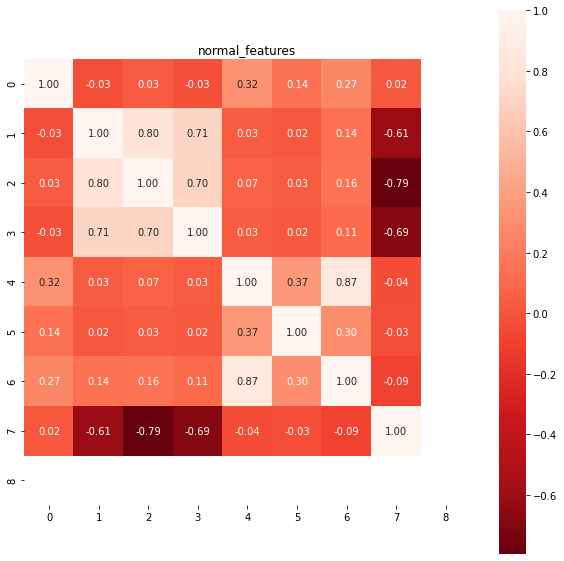

In [ ]:
plt.figure(figsize=(10,10))
plt.title('normal_features')
sns.heatmap(df_normal.corr(),annot=True,fmt='.2f', square=True,cmap="Reds_r")
plt.show()

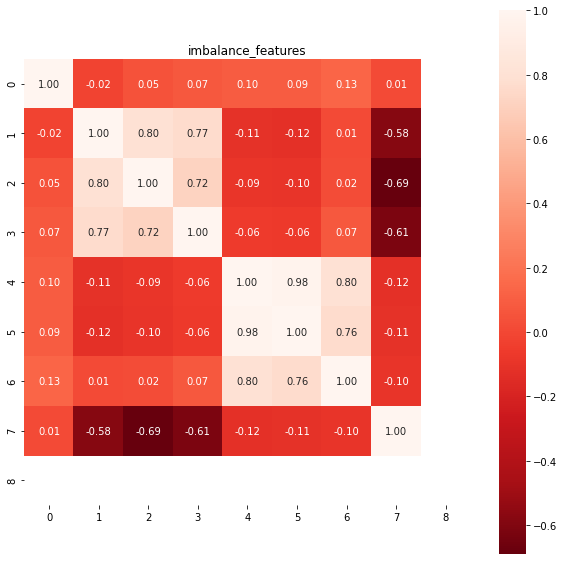

In [ ]:
plt.figure(figsize=(10,10))
plt.title('imbalance_features')
sns.heatmap(df_imbalance.corr(),annot=True,fmt='.2f', square=True,cmap="Reds_r")
plt.show()

##Normal State Features

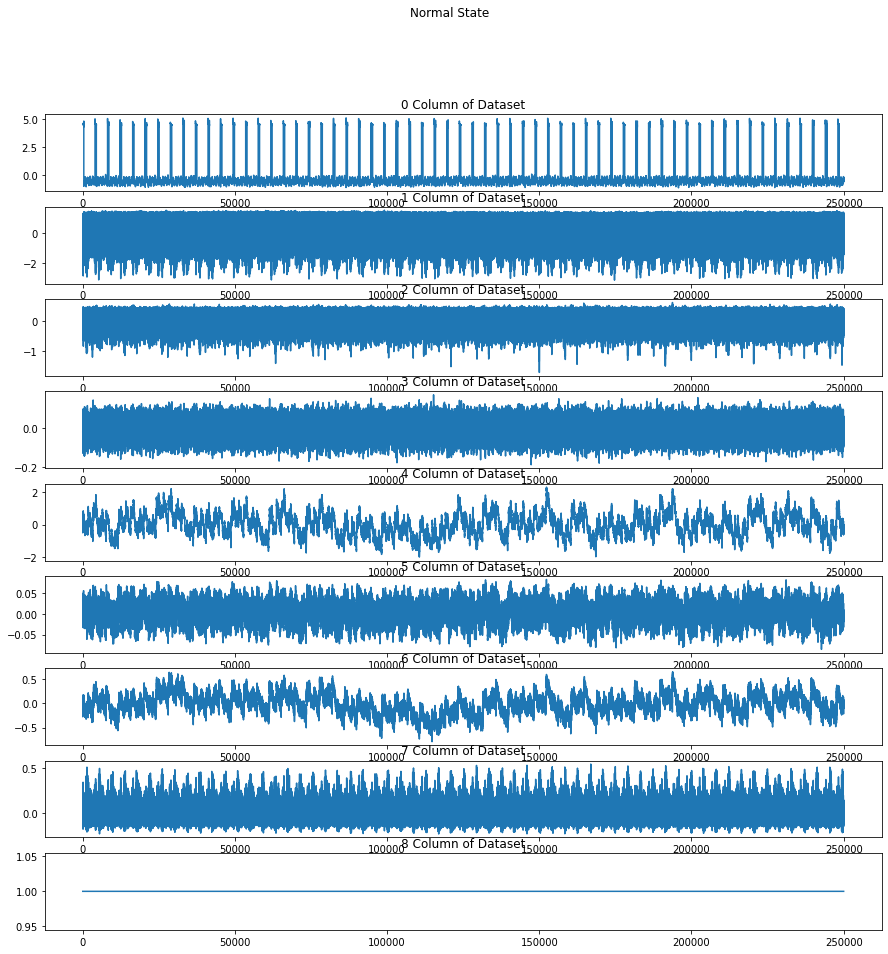

In [ ]:
fig, axs = plt.subplots(9, sharex=False, sharey=False,figsize=(15,15))
fig.suptitle('Normal State')
for i in df_normal.columns:
    axs[i].plot(df_normal[i])
    axs[i].set_title('{} Column of Dataset'.format(i))

##Imbalance Fault Features

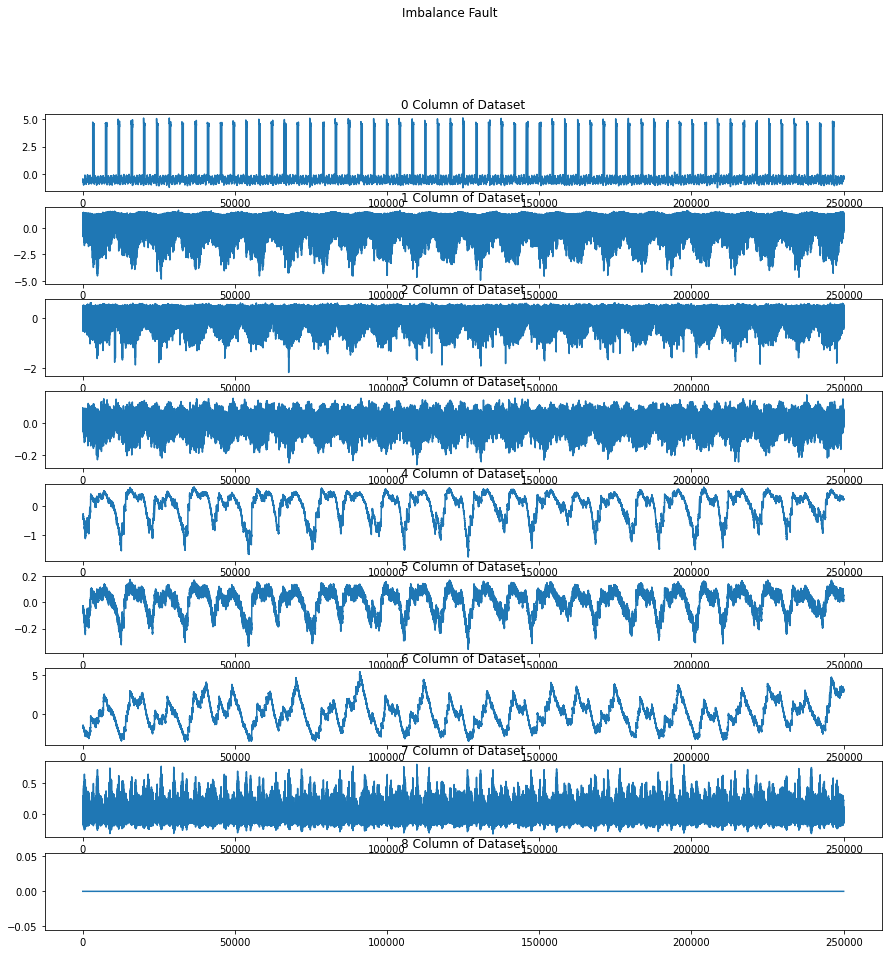

In [ ]:

fig, axs = plt.subplots(9, sharex=False, sharey=False,figsize=(15,15))
fig.suptitle('Imbalance Fault')
for i in df_imbalance.columns:
    axs[i].plot(df_imbalance[i])
    axs[i].set_title('{} Column of Dataset'.format(i))


In [10]:
#We added the label for both normal and imbalance dataset however for our anomaly detection we don't need
#labels. We only need normal data

normal_labels = df_normal.values[:, -1]

df_normal_ex_label = df_normal.values[:, 0:-1]

normal_train_data, normal_test_data, normal_train_labels, normal_test_labels = train_test_split(
    df_normal_ex_label, normal_labels, test_size=0.2, random_state=21
)

## Normal Data Normalization:

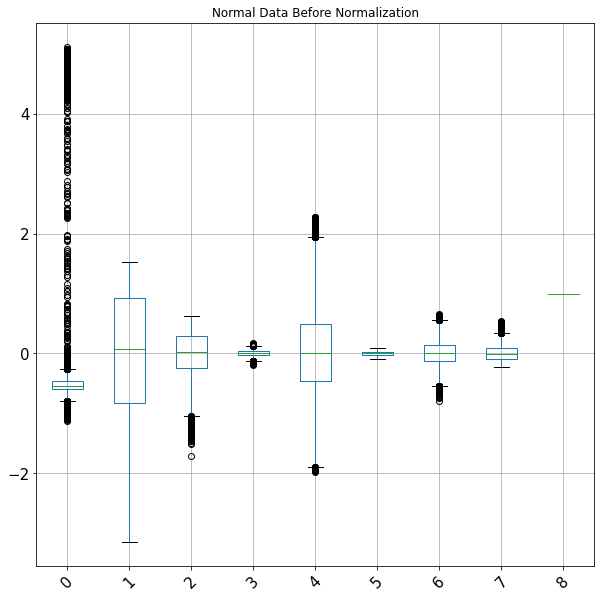

In [65]:
#Box plot for normal data before normalization

boxplot = df_normal.boxplot(rot=45, fontsize=15,
figsize=(10,10)).set_title("Normal Data Before Normalization")


In [51]:
#normalize full normal data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df_normal)
df_normal1=scaler.transform(df_normal)

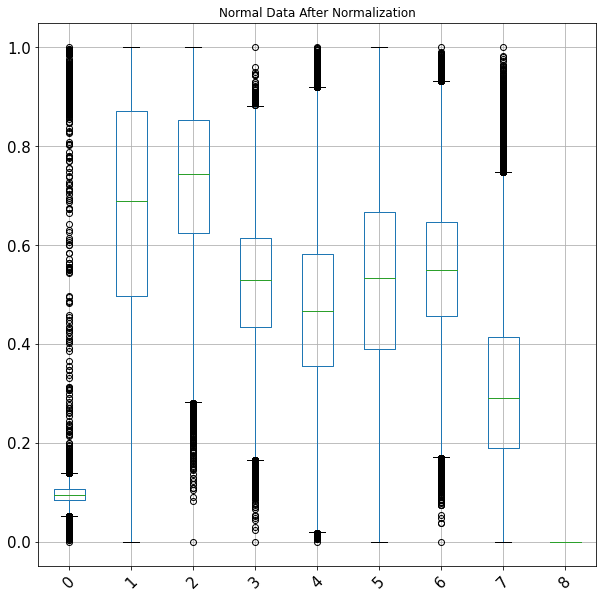

In [66]:

boxplot = pd.DataFrame(df_normal1).boxplot(rot=45, fontsize=15,
figsize=(10,10)).set_title("Normal Data After Normalization")


In [11]:
#normalize normal data
min_val = tf.reduce_min(normal_train_data)
max_val = tf.reduce_max(normal_train_data)

normal_train_data = (normal_train_data - min_val) / (max_val - min_val)
normal_test_data = (normal_test_data - min_val) / (max_val - min_val)

normal_train_data = tf.cast(normal_train_data, tf.float32)
normal_test_data = tf.cast(normal_test_data, tf.float32)

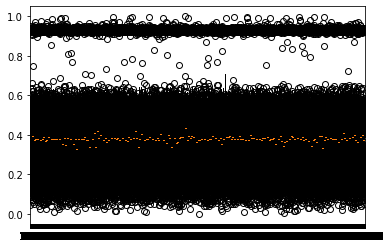

In [ ]:
#Boxplot after normalization
plt.boxplot(normal_train_data)
plt.show()

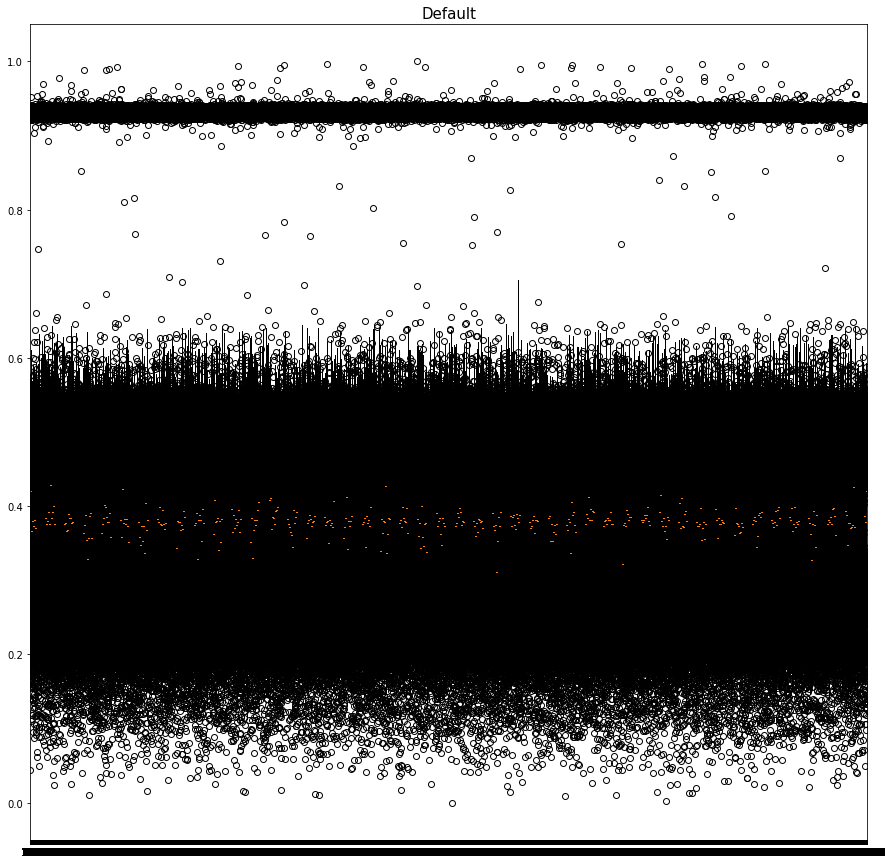

In [13]:
#Box plot for normal data after normalization

#boxplot1 = normal_train_data.boxplot(rot=45, fontsize=15,figsize=(10,10))
fig, axs = plt.subplots(figsize=(15, 15), sharey=True)
axs.boxplot(normal_train_data, vert=True)
plt.show()


In [ ]:
#plot first data from normal data
plt.grid()
plt.plot(np.arange(8), normal_train_data[0])
plt.plot(np.arange(8), normal_train_data[1])
plt.plot(np.arange(8), normal_train_data[2])
plt.title("A Normal Sensor Reading")
plt.show()

In [12]:
#splitting the imbalance data

anomalous_labels = df_imbalance.values[:, -1]

df_imbalance_ex_label = df_imbalance.values[:, 0:-1]

anomalous_train_data, anomalous_test_data, anomalous_train_labels, anomalous_test_labels = train_test_split(
    df_imbalance_ex_label, anomalous_labels, test_size=0.2, random_state=21
)

In [47]:
print (normal_train_data.shape,anomalous_train_data.shape)

(200000, 8) (200000, 8)


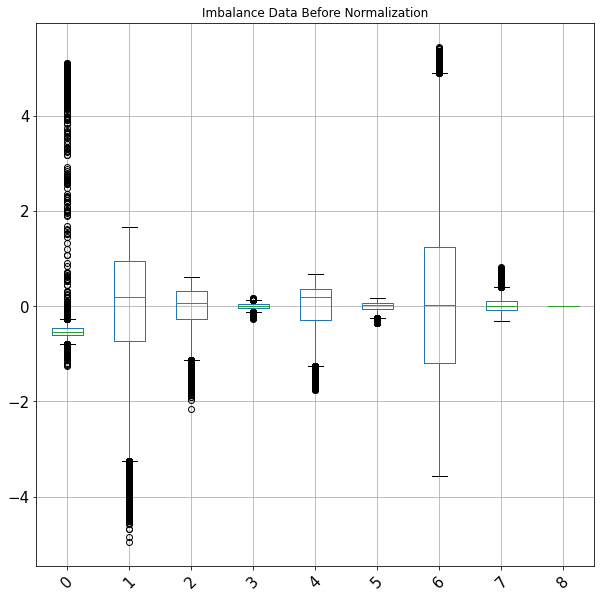

In [67]:
#Box plot for anomalous data before  normalization

boxplot = df_imbalance.boxplot(rot=45, fontsize=15,
figsize=(10,10)).set_title("Imbalance Data Before Normalization")


In [54]:
#normalize full imbalance data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df_imbalance)
df_imbalance1=scaler.transform(df_imbalance)

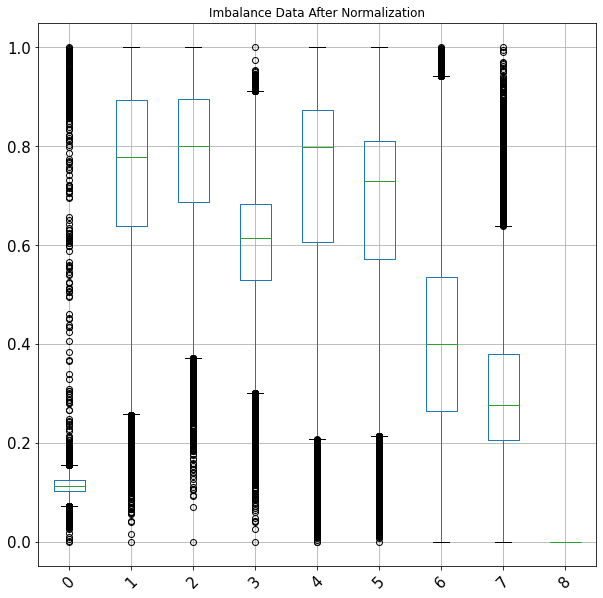

In [68]:
boxplot = pd.DataFrame(df_imbalance1).boxplot(rot=45, fontsize=15,
figsize=(10,10)).set_title("Imbalance Data After Normalization")

In [14]:
#normalizing the imbalance data
min_val = tf.reduce_min(anomalous_train_data)
max_val = tf.reduce_max(anomalous_train_data)

anomalous_train_data = (anomalous_train_data - min_val) / (max_val - min_val)
anomalous_test_data = (anomalous_test_data - min_val) / (max_val - min_val)

anomalous_train_data = tf.cast(anomalous_train_data, tf.float32)
anomalous_test_data = tf.cast(anomalous_test_data, tf.float32)

In [ ]:
##Boxplot for anomalous data after normalization
plt.boxplot(anomalous_train_data)
plt.show()

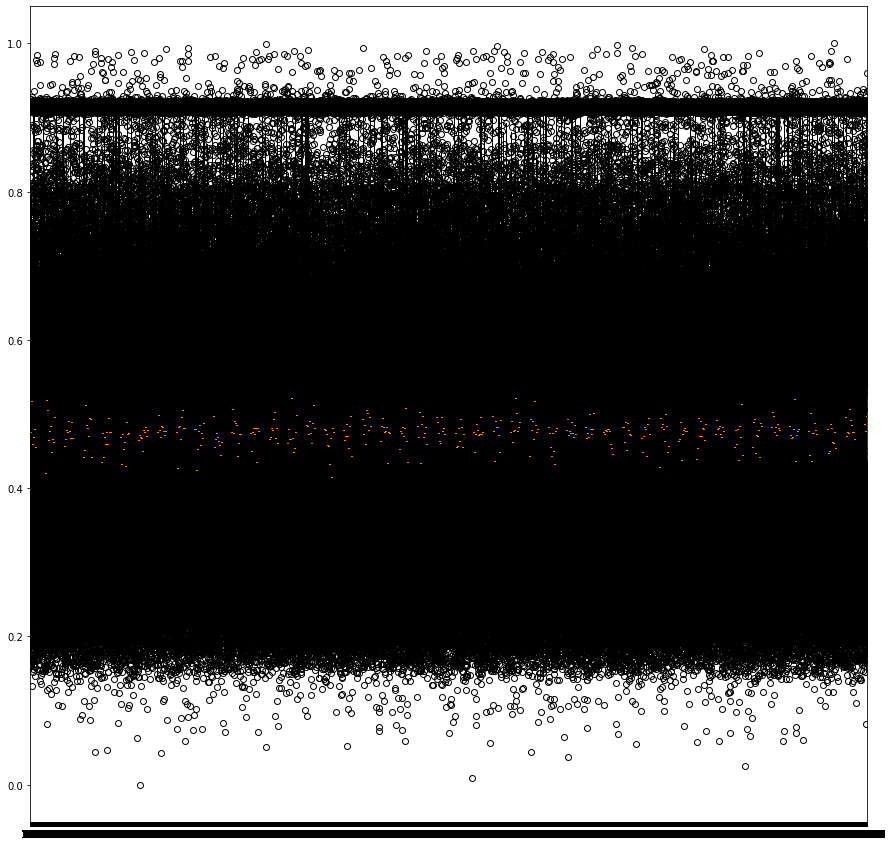

In [15]:

#Box plot for normal data after normalization

#boxplot1 = anomalous_train_data.boxplot(rot=45, fontsize=15,figsize=(10,10))
fig, axs = plt.subplots(figsize=(15, 15), sharey=True)
axs.boxplot(anomalous_train_data, vert=True)
plt.show()


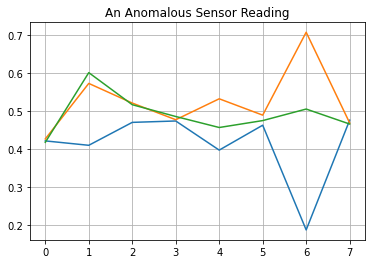

In [16]:
plt.grid()
plt.plot(np.arange(8), anomalous_train_data[0])
plt.plot(np.arange(8), anomalous_train_data[1])
plt.plot(np.arange(8), anomalous_train_data[2])
plt.title("An Anomalous Sensor Reading")
plt.show()

In [17]:
#Join normal and imbalance data frames
df_all = pd.concat([df_normal,df_imbalance],ignore_index=True)

#splitting all data

labels = df_all.values[:, -1]

df_all_ex_label = df_all.values[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    df_all_ex_label, labels, test_size=0.2, random_state=21
)

In [18]:
#normalizing all data
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

## Dimensionality Reduction using TSNE

In [ ]:
'''
from sklearn.manifold import TSNE
model =TSNE(n_components=2,random_state=0,perplexity=50,n_iter=1000)
tsne_data=model.fit_transform(anomalous_train_data)
tsne_data=np.vstack((tsne_data.T,nomalous_labels)).T

tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim1","Dim2","Label"))
sns.FacetGrid(tsne_df,hue="Label", size=5).map(plt.scatter,'Dim_1','Dim_2')

plt.legend()
plt.show()
'''

In [40]:
#Building Anomaly Detector 

class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(8, activation="relu"),
      layers.Dropout(0.2),
      layers.Dense(4, activation="relu"),
      layers.Dropout(0.2),
      layers.Dense(2, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(2, activation="relu"),
      layers.Dropout(0.2),
      layers.Dense(4, activation="relu"),
      layers.Dropout(0.2),
      layers.Dense(8, activation="sigmoid")])
    
    self.encoder = tf.keras.Sequential([
      layers.Dense(8, activation="relu"),
      layers.Dropout(0.2),
      layers.Dense(4, activation="relu"),
      layers.Dropout(0.2),
      layers.Dense(2, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(2, activation="relu"),
      layers.Dropout(0.2),
      layers.Dense(4, activation="relu"),
      layers.Dropout(0.2),
      layers.Dense(8, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [46]:
autoencoder.summary()

Model: "anomaly_detector_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_16 (Sequential)   (32, 2)                   118       
_________________________________________________________________
sequential_17 (Sequential)   (32, 8)                   58        
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________


In [44]:
autoencoder.compile(optimizer='adam', loss='mae')

In [45]:
#To see how to include testdata from imbalance

history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=32,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0430 - val_loss: 0.1099
Epoch 2/20
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0394 - val_loss: 0.1093
Epoch 3/20
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0394 - val_loss: 0.1094
Epoch 4/20
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0394 - val_loss: 0.1095
Epoch 5/20
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0394 - val_loss: 0.1099
Epoch 6/20
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0394 - val_loss: 0.1091
Epoch 7/20
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0394 - val_loss: 0.1093
Epoch 8/20
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0394 - val_loss: 0.1101
Epoch 9/20
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0394 - val_loss: 0.1094
Epoch 10/20
6250/6250 [==============================] - 10s 2ms/step - l

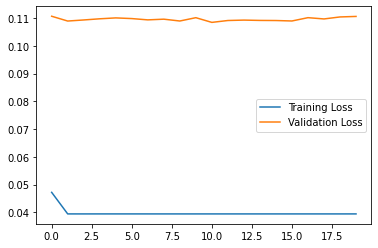

In [31]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

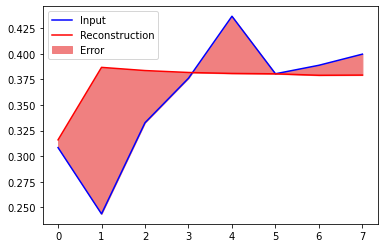

In [32]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(8), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

In [ ]:
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(8), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

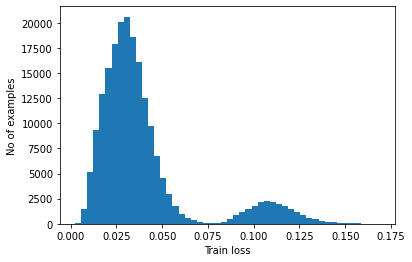

In [33]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [34]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.06686251


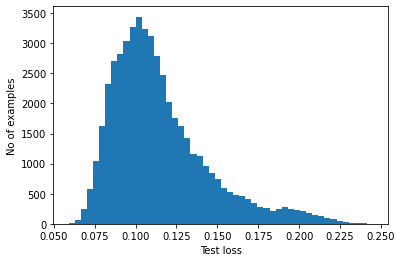

In [35]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [36]:
average_test_loss_threshold = np.mean(test_loss) + np.std(test_loss)
print("Average Test Loss: ", average_test_loss_threshold)

Average Test Loss:  0.14458677


In [37]:
def predict(model, data, threshold):
    reconstructions = model(data)
    loss = tf.keras.losses.mae(reconstructions, data)
    return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  #print("Precision = {}".format(precision_score(labels, predictions)))
  #print("Recall = {}".format(recall_score(labels, predictions)))

In [38]:
preds = predict(autoencoder, test_data, threshold)

print_stats(preds, test_labels)

Accuracy = 0.50215
